In [1]:
!python --version

Python 3.10.11


참고) 구글 코랩에서 바른 사용하기 : https://bareun.ai/docs

In [2]:
# 드라이브 마운트
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# 라이브러리
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

import sklearn as sk
import tensorflow as tf
from tensorflow import keras

In [41]:
# 데이터 불러오기
dataset_path = '/content/drive/MyDrive/value up/dataset/'
data = pd.read_csv(dataset_path + 'BukGu.csv')

data.head()

,content,dept
0,매천동 청구 장미아파트 삼우 그린 입구 불합리 위치 매천동 청구 장미아파트 삼우 그...,도시국 건설과
1,처리 중 언제까지 어린이보호구역 불법주차 불법적 재 신고한 지가 언제인데 아직 처리...,도시국 도시행정과
2,도로 개설 본인은 대구시 북구 태전동 번지 토지 소유자입니다 현재 상기 토지에서 농...,도시국 건설과
3,북구청장 감사실은 뭐 하는 곳입니까 묻습니다 불법에 대한 최고의 북구 전문가 북구청...,감사실
4,대구시장 북구청장 감사실은 뭐 하는 부서입니까 감사실 폐쇄하셔요 미관지구 대구시장 ...,감사실


In [42]:
# x, y 분리
x = data.loc[:, 'content'].values
y = data.loc[:, 'dept'].values

x.shape, y.shape

((6836,), (6836,))

In [43]:
# x_train, x_valid, y_train, y_valid 분리
from sklearn.model_selection import train_test_split

x_train, x_valid, y_train, y_valid = train_test_split(x, y, test_size=0.2, random_state=1, stratify=y)

x_train.shape, x_valid.shape, y_train.shape, y_valid.shape

((5468,), (1368,), (5468,), (1368,))

In [7]:
# 바른 다운로드 (리눅스 설치본)
!curl -LJks -H "uname:$(uname -a)" https://bareun.ai/api/get -o bareun-linux.deb
!ls

bareun-linux.deb  drive  sample_data


In [8]:
# 바른 설치
!uname -a
!dpkg -i bareun-linux.deb

Linux 4f78f65d80e2 5.10.147+ #1 SMP Sat Dec 10 16:00:40 UTC 2022 x86_64 x86_64 x86_64 GNU/Linux
Selecting previously unselected package bareun.
(Reading database ... 122518 files and directories currently installed.)
Preparing to unpack bareun-linux.deb ...
Unpacking bareun (2.0.3) ...
Setting up bareun (2.0.3) ...
System has not been booted with systemd as init system (PID 1). Can't operate.
Failed to connect to bus: Host is down
System has not been booted with systemd as init system (PID 1). Can't operate.
Failed to connect to bus: Host is down
Created symlink /etc/systemd/system/multi-user.target.wants/bareun.service → /etc/systemd/system/bareun.service.


In [9]:
# GPU를 이용하기 위한 tensorflow 설치
!curl -O https://storage.googleapis.com/tensorflow/libtensorflow/libtensorflow-gpu-linux-x86_64-2.9.1.tar.gz
!tar -C /opt/bareun -xzf libtensorflow-gpu-linux-x86_64-2.9.1.tar.gz

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  392M  100  392M    0     0  37.6M      0  0:00:10  0:00:10 --:--:-- 40.3M


In [10]:
# 환경 설정하기
%env BAREUN_ROOT="/opt/bareun"
%env LD_LIBRARY_PATH="/opt/bareun/lib"
!BAREUN_ROOT="/opt/bareun" LD_LIBRARY_PATH="/opt/bareun/lib" nohup /opt/bareun/bin/bareun&

env: BAREUN_ROOT="/opt/bareun"
env: LD_LIBRARY_PATH="/opt/bareun/lib"
nohup: appending output to 'nohup.out'


In [11]:
# 바른 서버가 실행된 정보 표시
!ps -ef | grep bareun

root        4087       1  0 09:55 ?        00:00:00 /opt/bareun/bin/bareun
root        4096    3258  0 09:55 ?        00:00:00 /bin/bash -c ps -ef | grep bareun
root        4098    4096  0 09:55 ?        00:00:00 grep bareun


In [12]:
# API키 등록 ('200 OK' 문구 확인)
!BAREUN_ROOT="/opt/bareun" LD_LIBRARY_PATH="/opt/bareun/lib" /opt/bareun/bin/bareun -reg koba-RBKJYUY-YKLU76Q-UXI6RFY-JXP6MRA

Use config file: /opt/bareun/config/bareun.json

------
200 OK
sucessfully registered koba-RBKJYUY-YKLU76Q-UXI6RFY-JXP6MRA


In [13]:
# PIP 패키지 설치
!pip install -U bareunpy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [14]:
# 바른 Python 라이브러리 사용
import sys
import bareunpy as brn
import google.protobuf.text_format as tf
API_KEY = "koba-RBKJYUY-YKLU76Q-UXI6RFY-JXP6MRA"

# 바른 형태소 분석기 선언
t = brn.Tagger(API_KEY, "localhost", 5656)

In [15]:
# 텍스트 입력 -> 형태소 분석 결과를 리스트로 반환
def bareun_transform(text):
    # 500자 단위로 슬라이싱
    ready_list = []
    while (len(text) > 500):
        temp_str = text[:500]
        last_space = temp_str.rfind(' ') # 앞에서 가장 가까운 공백 ' ' 위치를 찾는다
        temp_str = text[0:last_space]
        ready_list.append(temp_str) # 문자열을 약 500자 단위로 나누어 리스트에 추가한다.

        text = text[last_space:] # 슬라이싱 한 문자는 text에서 제거
    ready_list.append(text) # 500자 이하로 남은 문자열을 마지막에 추가한다.
    
    result_list = []
    for ready in ready_list:
        result = t.tags([ready]).morphs()
        result_list.append(result)

    return sum(result_list, [])

In [44]:
%%time
print("변경 전 :", x_train[0]) # 변경 전 예시 하나 출력

x_train_tk = []
x_valid_tk = []
for i, sentence in enumerate(x_train):
    x_train_tk.append(bareun_transform(sentence))
for i, sentence in enumerate(x_valid):
    x_valid_tk.append(bareun_transform(sentence))

print("변경 후 :", x_train_tk[0]) # 변경 후 예시 하나 출력

변경 전 : 가계 출입문 앞 우천 시 물고임 현상 해결 요구 원인 인도블록 침하 가계 출입문 앞 인도블록 침하로 우천 시 물고임 현상이 많아 가계 출입하는데 지장이 많으니 조속히 조치하여 주시고 또 한 가지 가계 앞 도로변 형 측구에도 물고임 현상이 있으니 조치 부탁드립니다
변경 후 : ['가계', '출입문', '앞', '우천', '시', '물고임', '현상', '해결', '요구', '원인', '인도블록', '침하', '가계', '출입문', '앞', '인도블록', '침하', '로', '우천', '시', '물', '고임', '현상', '이', '많', '아', '가계', '출입하', '는데', '지장', '이', '많', '으니', '조속히', '조치하', '아', '주', '시', '고', '또', '한', '가지', '가계', '앞', '도로변', '형', '측구', '에', '도', '물고임', '현상', '이', '있', '으니', '조치', '부탁', '드리', 'ㅂ니다']
CPU times: user 17.9 s, sys: 1.52 s, total: 19.4 s
Wall time: 8min 18s


In [17]:
#gensim은 자연어 처리를 위한 오픈소스 라이브러리입니다. 토픽 모델링, 워드 임베딩 등 다양한 자연어 처리 기능을 제공
!pip install gensim

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [18]:
import gensim
gensim.__version__

'4.3.1'

In [45]:
from gensim.models import Word2Vec

# Word2Vec 모델 생성
wv_model = Word2Vec(x_train_tk, vector_size= 1000, window= 5, min_count= 5, workers = 4, sg = 1)

In [46]:
# Word2Vec 모델로부터 하나의 문장을 벡터화 시키는 함수
def get_sent_embedding(model, embedding_size, tokenized_words):
    # 임베딩 벡터를 0으로 초기화
    feature_vec = np.zeros((embedding_size,), dtype='float32')
    # 단어 개수 초기화
    n_words = 0
    # 모델 단어 집합 생성
    index2word_set = set(model.wv.index_to_key)
    # 문장의 단어들을 하나씩 반복
    for word in tokenized_words:
        # 모델 단어 집합에 해당하는 단어일 경우에만
        if word in index2word_set:
            # 단어 개수 1 증가
            n_words += 1
            # 임베딩 벡터에 해당 단어의 벡터를 더함
            feature_vec = np.add(feature_vec, model.wv[word])
    # 단어 개수가 0보다 큰 경우 벡터를 단어 개수로 나눠줌 (평균 임베딩 벡터 계산)
    if (n_words > 0):
        feature_vec = np.divide(feature_vec, n_words)
    return feature_vec

In [47]:
# 문장벡터 데이터 셋 만들기
def get_dataset(sentences, model, num_features):
    dataset = list()

    # 각 문장을 벡터화해서 리스트에 저장
    for sent in sentences:
        dataset.append(get_sent_embedding(model, num_features, sent))

    # 리스트를 numpy 배열로 변환하여 반환
    sent_embedding_vectors = np.stack(dataset)
    
    return sent_embedding_vectors

In [48]:
# 학습 데이터의 문장들을 Word2Vec 모델을 사용하여 벡터화
x_train_vecs = get_dataset(x_train_tk, wv_model, 1000)
x_valid_vecs = get_dataset(x_valid_tk, wv_model, 1000)

x_train_vecs

array([[ 0.06876321,  0.01847903,  0.02963711, ..., -0.06741653,
        -0.06724385, -0.02875711],
       [-0.01800687,  0.01341035, -0.04794799, ..., -0.23028147,
        -0.12448583, -0.04272993],
       [ 0.06509982,  0.01957168,  0.03079594, ..., -0.07299015,
        -0.09381497, -0.05294111],
       ...,
       [ 0.11963781,  0.00884863,  0.00044681, ..., -0.07149883,
        -0.07361454, -0.03080316],
       [ 0.12006728, -0.02645883, -0.015787  , ..., -0.16286115,
        -0.06345358, -0.03856116],
       [ 0.11785935,  0.01065707,  0.04702228, ..., -0.07802922,
        -0.07938819, -0.01432094]], dtype=float32)

In [49]:
# 모델링 시작

In [62]:
# 성능정보 수집
result_acc = {}
result_f1 = {}

In [63]:
# random forest
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(random_state=1)

rf.fit(x_train_vecs, y_train)

RandomForestClassifier(random_state=1)

y_valid: ['도시국 교통과' '감사실' '감사실' '도시국 건축주택과' '읍/면/동사무소' '도시국 건축주택과' '감사실' '도시국 건설과'
 '도시국 교통과' '도시국 건설과']
y_pred: ['도시국 교통과' '감사실' '감사실' '도시국 건축주택과' '읍/면/동사무소' '도시국 건축주택과' '감사실' '도시국 교통과'
 '도시국 교통과' '도시국 건설과']
accuracy: 0.706140350877193
f1 score: 0.4922744601684869


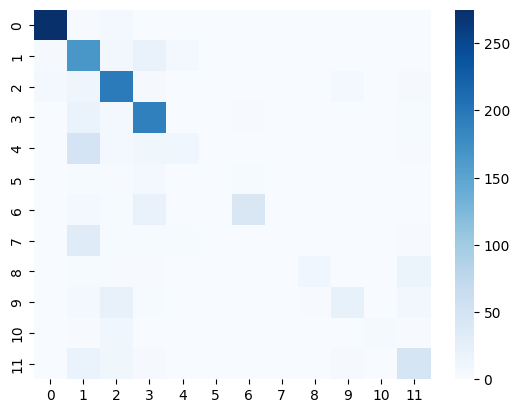

               precision    recall  f1-score   support

          감사실       0.95      0.96      0.96       285
      도시국 건설과       0.52      0.81      0.63       206
    도시국 건축주택과       0.71      0.85      0.77       231
      도시국 교통과       0.72      0.85      0.78       224
    도시국 도시관리과       0.48      0.13      0.20        78
    도시국 도시행정과       1.00      0.06      0.11        18
    도시국 재난안전과       0.86      0.58      0.69        73
  문화녹지국 공원녹지과       0.00      0.00      0.00        45
  복지환경국 자원순환과       0.77      0.27      0.40        37
  복지환경국 환경관리과       0.63      0.34      0.44        65
     읍/면/동사무소       0.71      0.26      0.38        19
주민생활지원국 환경관리과       0.54      0.55      0.55        87

     accuracy                           0.71      1368
    macro avg       0.66      0.47      0.49      1368
 weighted avg       0.69      0.71      0.67      1368



In [65]:
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, classification_report

y_pred = rf.predict(x_valid_vecs)

print('y_valid:', y_valid[:10])
print('y_pred:', y_pred[:10])

print('accuracy:', accuracy_score(y_valid, y_pred))
print('f1 score:', f1_score(y_valid, y_pred, average='macro'))

sns.heatmap(confusion_matrix(y_valid, y_pred), cmap='Blues')
plt.show()

print(classification_report(y_valid, y_pred))

result_acc['rf'] = accuracy_score(y_valid, y_pred)
result_f1['rf'] = f1_score(y_valid, y_pred, average='macro')

In [66]:
!pip install lightgbm

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [67]:
%%time
from lightgbm import LGBMClassifier

lgbm = LGBMClassifier(random_state=1)

lgbm.fit(x_train_vecs, y_train)

CPU times: user 7min 23s, sys: 719 ms, total: 7min 24s
Wall time: 2min 19s


LGBMClassifier(random_state=1)

y_valid: ['도시국 교통과' '감사실' '감사실' '도시국 건축주택과' '읍/면/동사무소' '도시국 건축주택과' '감사실' '도시국 건설과'
 '도시국 교통과' '도시국 건설과']
y_pred: ['도시국 교통과' '감사실' '감사실' '도시국 건축주택과' '도시국 건축주택과' '도시국 건축주택과' '감사실' '도시국 교통과'
 '도시국 교통과' '도시국 건설과']
accuracy: 0.7288011695906432
f1 score: 0.5461024658105805


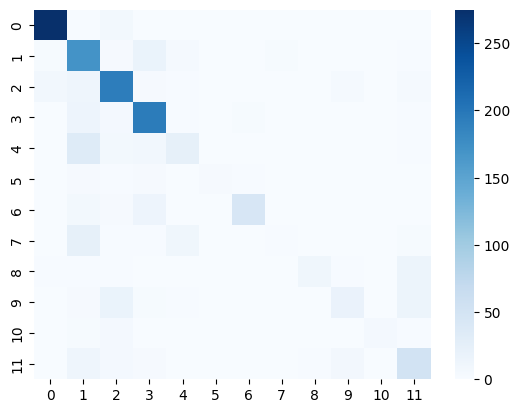

               precision    recall  f1-score   support

          감사실       0.95      0.96      0.95       285
      도시국 건설과       0.59      0.83      0.69       206
    도시국 건축주택과       0.75      0.84      0.79       231
      도시국 교통과       0.76      0.87      0.81       224
    도시국 도시관리과       0.50      0.31      0.38        78
    도시국 도시행정과       0.67      0.22      0.33        18
    도시국 재난안전과       0.87      0.62      0.72        73
  문화녹지국 공원녹지과       0.29      0.04      0.08        45
  복지환경국 자원순환과       0.73      0.30      0.42        37
  복지환경국 환경관리과       0.53      0.29      0.38        65
     읍/면/동사무소       0.75      0.32      0.44        19
주민생활지원국 환경관리과       0.51      0.60      0.55        87

     accuracy                           0.73      1368
    macro avg       0.66      0.52      0.55      1368
 weighted avg       0.72      0.73      0.71      1368



In [68]:
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, classification_report

y_pred = lgbm.predict(x_valid_vecs)

print('y_valid:', y_valid[:10])
print('y_pred:', y_pred[:10])


print('accuracy:', accuracy_score(y_valid, y_pred))
print('f1 score:', f1_score(y_valid, y_pred, average='macro'))

sns.heatmap(confusion_matrix(y_valid, y_pred), cmap='Blues')
plt.show()

print(classification_report(y_valid, y_pred))

result_acc['lgbm'] = accuracy_score(y_valid, y_pred)
result_f1['lgbm'] = f1_score(y_valid, y_pred, average='macro')

In [69]:
!pip install catboost

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [70]:
from catboost import CatBoostClassifier
cb = CatBoostClassifier(random_state=1, task_type='GPU')

cb.fit(x_train_vecs, y_train, verbose=0)

y_valid: ['도시국 교통과' '감사실' '감사실' '도시국 건축주택과' '읍/면/동사무소' '도시국 건축주택과' '감사실' '도시국 건설과'
 '도시국 교통과' '도시국 건설과']
y_pred: [['도시국 교통과']
 ['감사실']
 ['감사실']
 ['도시국 건축주택과']
 ['읍/면/동사무소']
 ['도시국 건축주택과']
 ['감사실']
 ['도시국 건축주택과']
 ['도시국 교통과']
 ['도시국 건설과']]
accuracy: 0.7404970760233918
f1 score: 0.5818638281034174


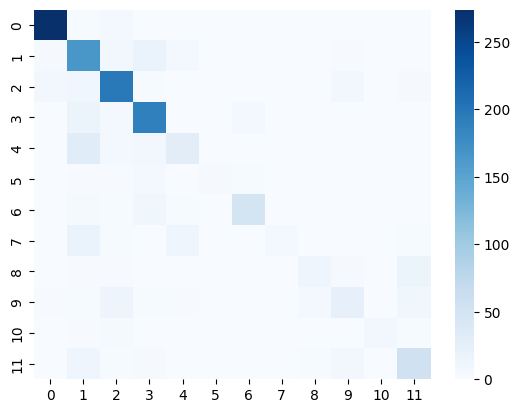

               precision    recall  f1-score   support

          감사실       0.95      0.96      0.95       285
      도시국 건설과       0.61      0.80      0.69       206
    도시국 건축주택과       0.77      0.85      0.81       231
      도시국 교통과       0.78      0.85      0.81       224
    도시국 도시관리과       0.53      0.37      0.44        78
    도시국 도시행정과       1.00      0.22      0.36        18
    도시국 재난안전과       0.81      0.68      0.74        73
  문화녹지국 공원녹지과       0.60      0.13      0.22        45
  복지환경국 자원순환과       0.57      0.32      0.41        37
  복지환경국 환경관리과       0.50      0.35      0.41        65
     읍/면/동사무소       0.73      0.42      0.53        19
주민생활지원국 환경관리과       0.57      0.63      0.60        87

     accuracy                           0.74      1368
    macro avg       0.70      0.55      0.58      1368
 weighted avg       0.74      0.74      0.72      1368



In [71]:
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, classification_report

y_pred = cb.predict(x_valid_vecs)

print('y_valid:', y_valid[:10])
print('y_pred:', y_pred[:10])


print('accuracy:', accuracy_score(y_valid, y_pred))
print('f1 score:', f1_score(y_valid, y_pred, average='macro'))

sns.heatmap(confusion_matrix(y_valid, y_pred), cmap='Blues')
plt.show()

print(classification_report(y_valid, y_pred))

result_acc['cb'] = accuracy_score(y_valid, y_pred)
result_f1['cb'] = f1_score(y_valid, y_pred, average='macro')

In [72]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

lda = LinearDiscriminantAnalysis()

lda.fit(x_train_vecs, y_train)

LinearDiscriminantAnalysis()

y_valid: ['도시국 교통과' '감사실' '감사실' '도시국 건축주택과' '읍/면/동사무소' '도시국 건축주택과' '감사실' '도시국 건설과'
 '도시국 교통과' '도시국 건설과']
y_pred: ['도시국 교통과' '감사실' '감사실' '도시국 건축주택과' '읍/면/동사무소' '도시국 건축주택과' '감사실' '도시국 건설과'
 '도시국 교통과' '도시국 건설과']
accuracy: 0.7543859649122807
f1 score: 0.6553507753486137


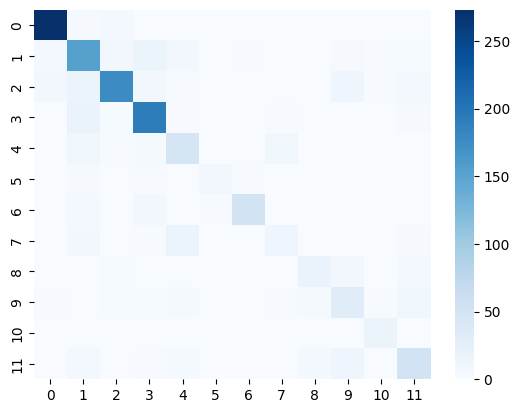

               precision    recall  f1-score   support

          감사실       0.94      0.96      0.95       285
      도시국 건설과       0.67      0.75      0.71       206
    도시국 건축주택과       0.85      0.76      0.81       231
      도시국 교통과       0.80      0.86      0.83       224
    도시국 도시관리과       0.53      0.59      0.56        78
    도시국 도시행정과       0.62      0.44      0.52        18
    도시국 재난안전과       0.90      0.71      0.79        73
  문화녹지국 공원녹지과       0.42      0.29      0.34        45
  복지환경국 자원순환과       0.60      0.49      0.54        37
  복지환경국 환경관리과       0.43      0.48      0.45        65
     읍/면/동사무소       0.73      0.84      0.78        19
주민생활지원국 환경관리과       0.58      0.60      0.59        87

     accuracy                           0.75      1368
    macro avg       0.67      0.65      0.66      1368
 weighted avg       0.76      0.75      0.75      1368



In [73]:
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, classification_report

y_pred = lda.predict(x_valid_vecs)

print('y_valid:', y_valid[:10])
print('y_pred:', y_pred[:10])


print('accuracy:', accuracy_score(y_valid, y_pred))
print('f1 score:', f1_score(y_valid, y_pred, average='macro'))

sns.heatmap(confusion_matrix(y_valid, y_pred), cmap='Blues')
plt.show()

print(classification_report(y_valid, y_pred))

result_acc['lda'] = accuracy_score(y_valid, y_pred)
result_f1['lda'] = f1_score(y_valid, y_pred, average='macro')

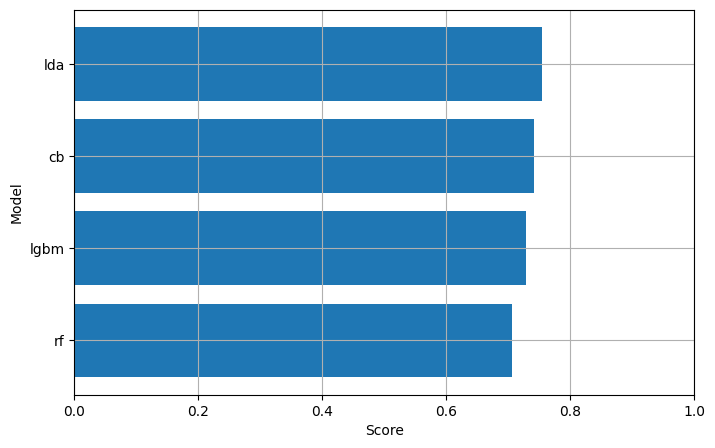

In [78]:
### acc 비교
# 데이터프레임 만들기
df = pd.DataFrame.from_dict(result_acc, orient='index', columns=['score'])
df.sort_values(by='score', ascending=True, inplace=True)

# 성능 비교
plt.figure(figsize=(8, 5))
plt.barh(y=df.index, width=df['score'])
plt.xlabel('Score')
plt.ylabel('Model')
plt.xlim(0,1)
plt.grid()
plt.show()

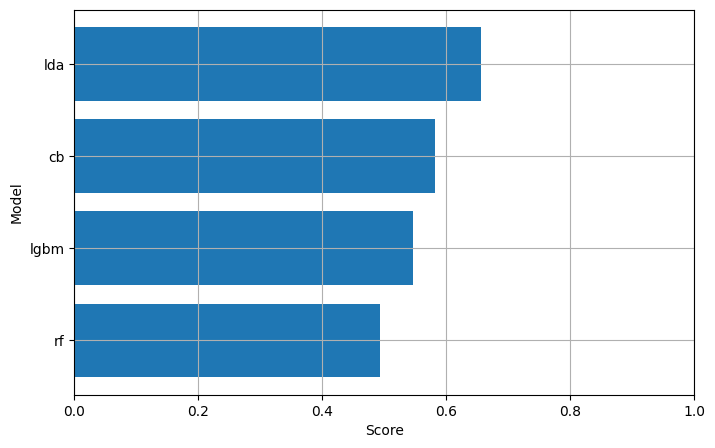

In [79]:
### f1 비교
# 데이터프레임 만들기
df = pd.DataFrame.from_dict(result_f1, orient='index', columns=['score'])
df.sort_values(by='score', ascending=True, inplace=True)

# 성능 비교
plt.figure(figsize=(8, 5))
plt.barh(y=df.index, width=df['score'])
plt.xlabel('Score')
plt.ylabel('Model')
plt.xlim(0,1)
plt.grid()
plt.show()